<a href="https://colab.research.google.com/github/ManishKr19/Edureka-Data-Science/blob/main/M6_CS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cereals = pd.read_csv(r"/content/cereal.csv")

In [3]:
sugars = cereals.sugars.values
vitamins = cereals.vitamins.values

In [4]:
cereals.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


(array([ 8.,  0., 63.,  0.,  0.,  0.,  0.,  0.,  0.,  6.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

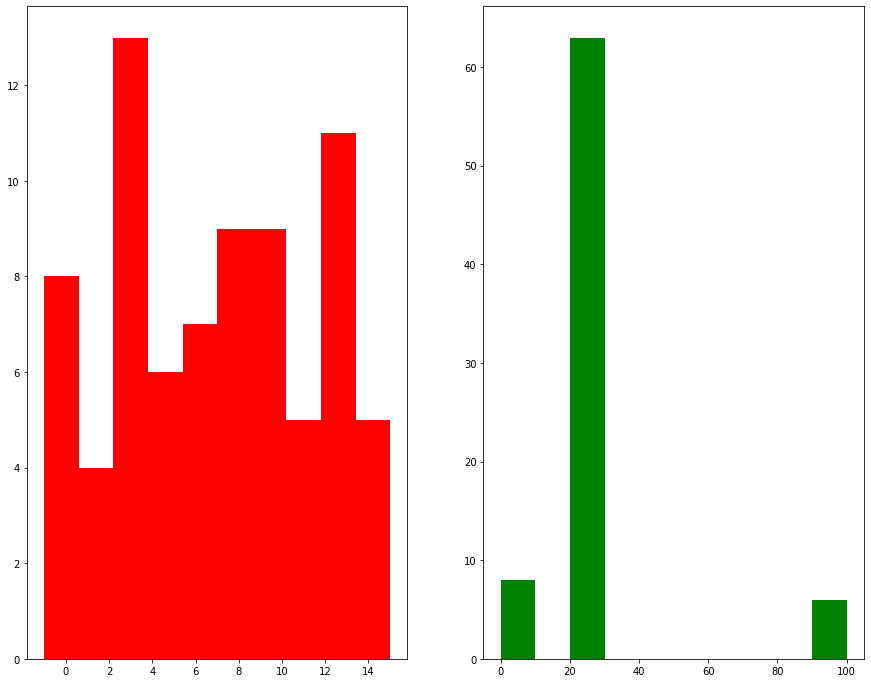

In [5]:
plt.figure(figsize=(15,12))
plt.subplot(1, 2, 1)
plt.hist(sugars, color = 'red')
plt.subplot(1, 2, 2)
plt.hist(vitamins, color = 'green')

In [6]:
manufacture = {'N': 'Nabisco',
               'Q': 'Quaker Oats',
               'K': 'Kelloggs',
               'R': 'Raslston Purina',
               'G': 'General Mills',
               'P' :'Post',
               'A':'American Home Foods Products'
}

In [7]:
cereals.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [8]:
cereals['manufacturer'] = cereals['mfr'].map(lambda x: manufacture[x])

In [9]:
manufacturer = cereals.manufacturer.values
manC = cereals['manufacturer'].value_counts()

In [10]:
manC

Kelloggs                        23
General Mills                   22
Post                             9
Quaker Oats                      8
Raslston Purina                  8
Nabisco                          6
American Home Foods Products     1
Name: manufacturer, dtype: int64

In [11]:
manu = manC.index.values


<BarContainer object of 7 artists>

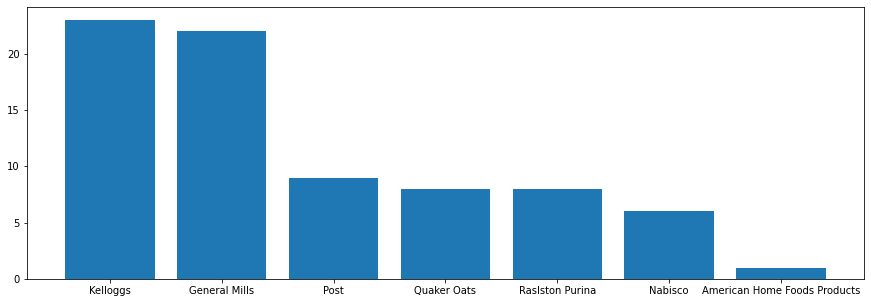

In [12]:
plt.figure(figsize=(15,5))
plt.bar(manu, manC)

In [13]:
y = cereals['rating'].values

In [14]:
dataType = cereals.dtypes

In [15]:
dataType

name             object
mfr              object
type             object
calories          int64
protein           int64
fat               int64
sodium            int64
fiber           float64
carbo           float64
sugars            int64
potass            int64
vitamins          int64
shelf             int64
weight          float64
cups            float64
rating          float64
manufacturer     object
dtype: object

In [16]:
X = cereals.loc[:, dataType.isin([dataType[3], dataType[7]])]

In [17]:
import numpy as np
from random import sample
def train_test_split(X, y, r):
    '''
    Function will return the training dataframe and test dateframe from df by ratio r'''
    l = len(X)
    ts = int(np.floor(r*l))
    index = sample(range(l), l)
    testI = index[:ts]
    trainI = index[ts:]
    X_train, y_train = X.loc[trainI], y[trainI]
    X_test, y_test = X.loc[testI], y[testI]
    
    return X_train, y_train, X_test, y_test
    

In [18]:
X_train, y_train, X_test, y_test = train_test_split(X, y, 0.25)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression()

In [21]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
y_pred = model.predict(X_test)

In [23]:
print('Coefficients: \n', model.coef_)

Coefficients: 
 [-7.12517814e-11  1.04712189e-09 -5.41106494e-10 -1.74330272e-11
  1.10160523e-09  3.49486887e-10 -2.31902990e-10 -1.08747733e-11
 -1.63831379e-11 -6.98226199e-17 -3.60605643e-16  8.62211778e-17
  1.00000000e+00]


In [25]:
model.score(X_test, y_test)

1.0

In [26]:
from sklearn.metrics import mean_squared_error, r2_score
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")


Mean squared error: 7.0814797891839885e-28


In [27]:
print(f"r2_score: {r2_score(y_test, y_pred)}")

r2_score: 1.0
